In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

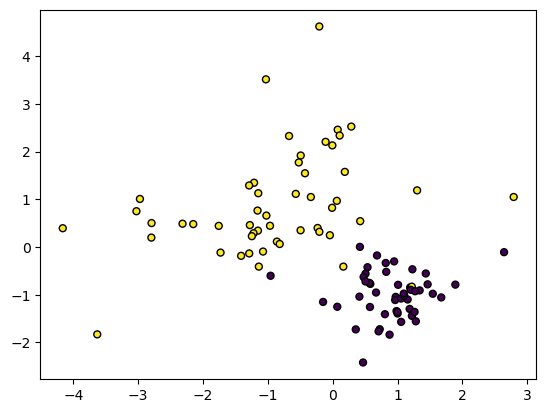

In [3]:
X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.0, random_state=999
)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [6]:
H = lambda x: np.heaviside(x,1).astype(int)

class RosenBlattPerceptron(object):

    def __init__(self, epochs=10) -> None:
        self.epochs = epochs

    def predict(self, X):
        return H(np.dot(X, self.weights[1:]) + self.weights[0])
    
    def train(self, X, y):
        
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.epochs):
            errors = 0
            for xi, y_true in zip(X, y):
                # update rule
                error = y_true - self.predict(xi)
                # update the weights
                if error != 0.0:
                    self.weights[1:] += error * xi
                    # Bias
                    self.weights[0] += error
                    errors += 1
            self.errors.append(errors)
            if self.errors == 0:
                break

        return self
        

Weights: [ 3.         -3.54158679  4.35239964]


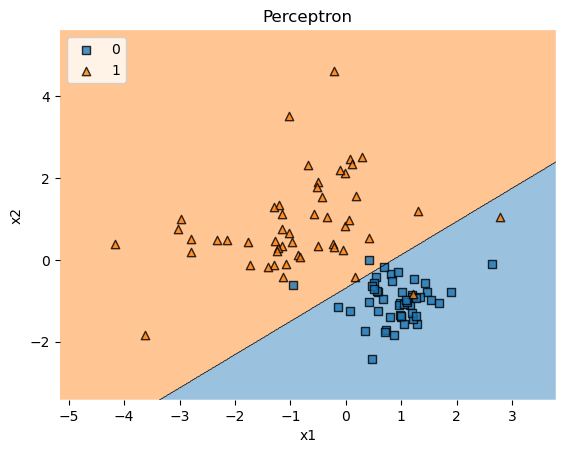

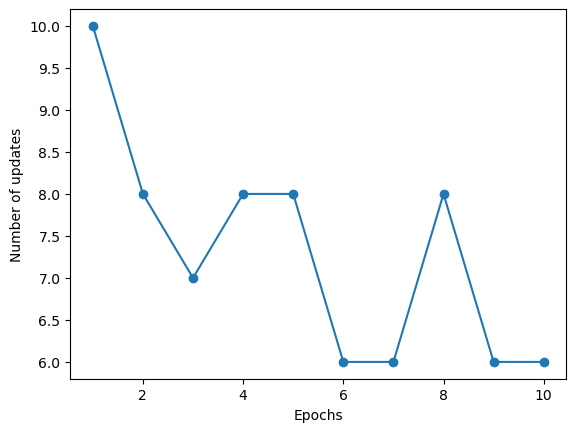

In [5]:
rb = RosenBlattPerceptron(epochs=10)

rb.train(X, y)
print('Weights: %s' % rb.weights)
plot_decision_regions(X, y, clf=rb)
plt.title('Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()


plt.plot(range(1, len(rb.errors) + 1), rb.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()